In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
import numpy as np
import pandas as pd
import pyteomics.mzml
import pyopenms
import pymzml
from mzsql import *

/home/wkumler/miniconda3/envs/mzsql/lib/python3.12/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


## Chromatogram extraction

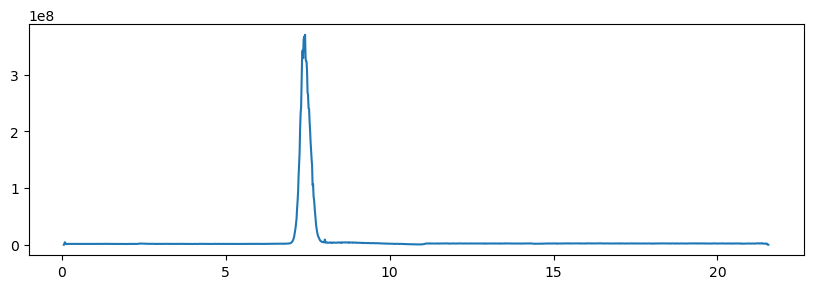

In [2]:
chrom_data = get_chrom_mzml_pyteomics('demo_data/180205_Poo_TruePoo_Full1.mzML', 118.0865, 10)
plt.plot(chrom_data["rt"], chrom_data["int"])

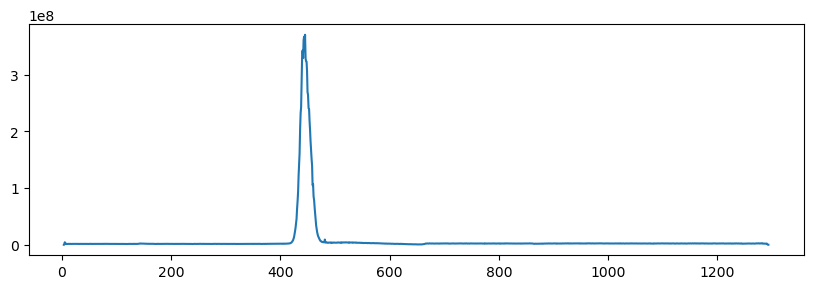

In [3]:
chrom_data = get_chrom_mzml_pyopenms("demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)
plt.plot(chrom_data["rt"], chrom_data["int"])

[Warning] Not index found and build_index_from_scratch is False


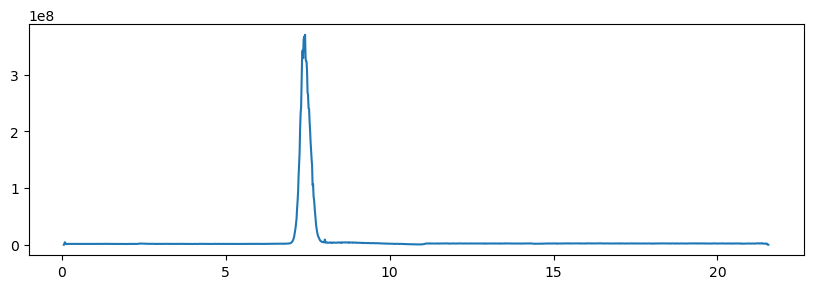

In [4]:
chrom_data = get_chrom_mzml_pymzml("demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)
plt.plot(chrom_data["rt"], chrom_data["int"])

## Spectrum extraction

<StemContainer object of 3 artists>

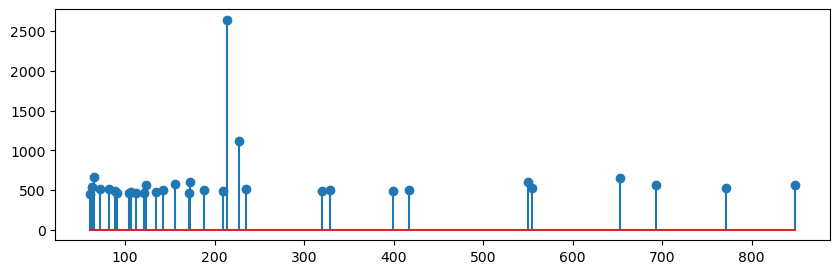

In [5]:
spec_data = get_spec_mzml_pyteomics("demo_data/180205_Poo_TruePoo_Full1.mzML", 1)
plt.stem(spec_data["mz"], spec_data["int"])

<StemContainer object of 3 artists>

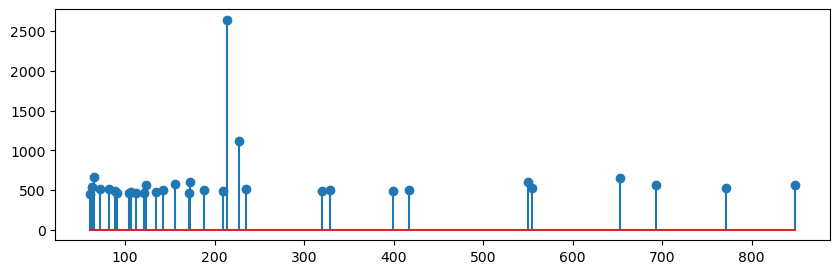

In [6]:
spec_data = get_spec_mzml_pyopenms("demo_data/180205_Poo_TruePoo_Full1.mzML", 1)
plt.stem(spec_data["mz"], spec_data["int"])

<StemContainer object of 3 artists>

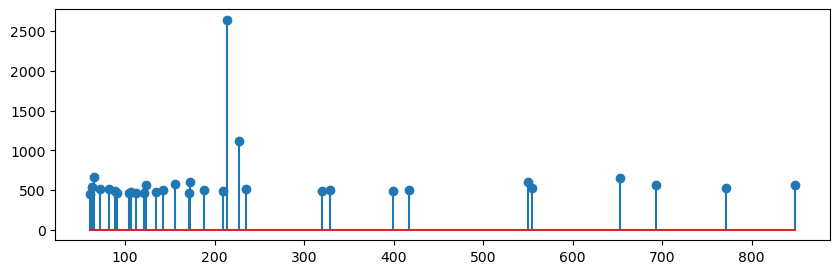

In [7]:
spec_data = get_spec_mzml_pymzml("demo_data/180205_Poo_TruePoo_Full1.mzML", 3) # Referenced by scan num, not index!!!
plt.stem(spec_data["mz"], spec_data["int"])

## RT range queries
This should be a lot faster - combo of the above strategies and could be massively sped up with a precompiled index of the scan numbers and their associated RTs. However, I don't think most of these objects have that.

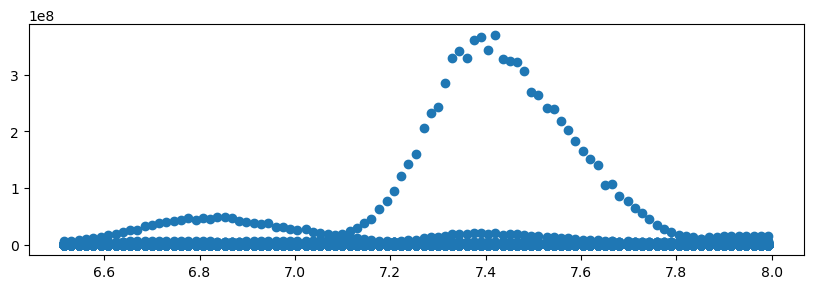

In [8]:
rtrange_data = get_rtrange_mzml_pyteomics('demo_data/180205_Poo_TruePoo_Full1.mzML', 6.5, 8)
plt.scatter(rtrange_data["rt"], rtrange_data["int"])

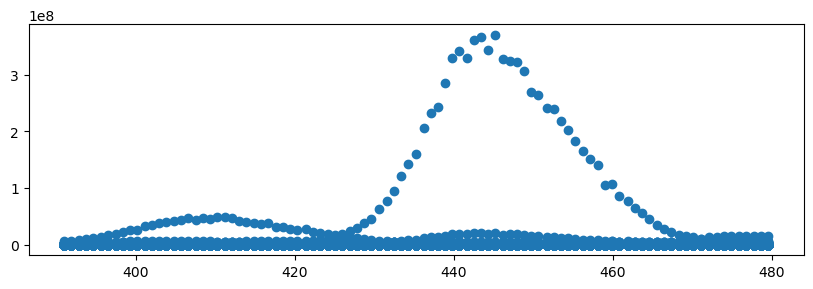

In [9]:
rtrange_data = get_rtrange_mzml_pyopenms('demo_data/180205_Poo_TruePoo_Full1.mzML', 6.5, 8)
plt.scatter(rtrange_data["rt"], rtrange_data["int"])

[Warning] Not index found and build_index_from_scratch is False


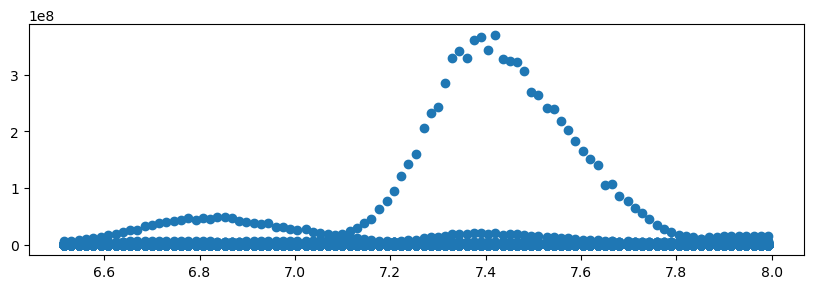

In [10]:
rtrange_data = get_rtrange_mzml_pymzml("demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)
plt.scatter(rtrange_data["rt"], rtrange_data["int"])

## Additional pyOpenMS methods that are worth comparing against

Using the "massql" syntax

In [11]:
# "SELECT * FROM MS1 WHERE mz BETWEEN 118.06 AND 118.1"
# v = exp.get_massql_df(ion_mobility=False)
# Note to self - ask them to update the docstring to reflect the correct parameter name
# Update - nevermind, seems like this just returns the entire thing into memory. Maybe a reasonable
# way to get a pure Pandas/in memory comparison
#exp = pyopenms.MSExperiment()
#pyopenms.MzMLFile().load("demo_data/180205_Poo_TruePoo_Full1.mzML", exp)
#exp.updateRanges()
#ms1_df, ms2_df = exp.get_massql_df(ion_mobility=False)
#ms1_df.head()

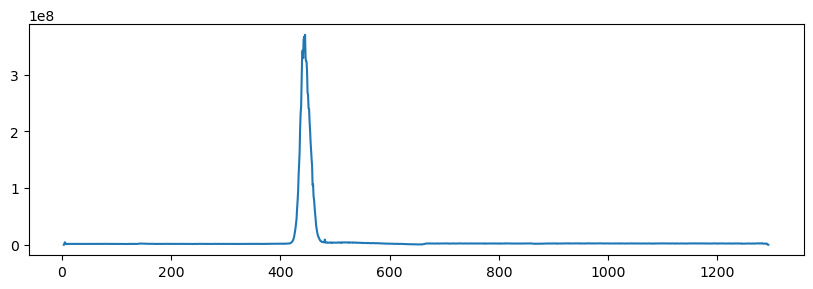

In [12]:
chrom_data = get_chrom_mzml_pyopenms_2DPeak("demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)
plt.plot(chrom_data["rt"], chrom_data["int"])

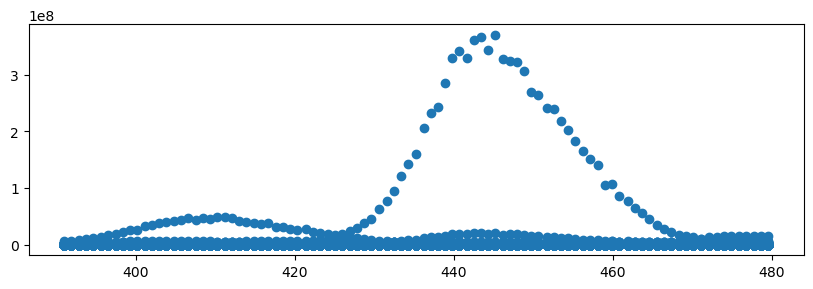

In [13]:
rtrange_data = get_rtrange_mzml_pyopenms_2DPeak("demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)
plt.scatter(rtrange_data["rt"], rtrange_data["int"])

## Time comparisons for mzML access methods

In [14]:
import timeit

In [15]:
pyteomics_spec = timeit.repeat('get_spec_mzml_pyteomics("demo_data/180205_Poo_TruePoo_Full1.mzML", 1)', globals=globals(), number=1, repeat=10)
pymzml_spec = timeit.repeat('get_spec_mzml_pymzml("demo_data/180205_Poo_TruePoo_Full1.mzML", 3)', globals=globals(), number=1, repeat=10)
pyopenms_spec = timeit.repeat('get_spec_mzml_pyopenms("demo_data/180205_Poo_TruePoo_Full1.mzML", 1)', globals=globals(), number=1, repeat=10)

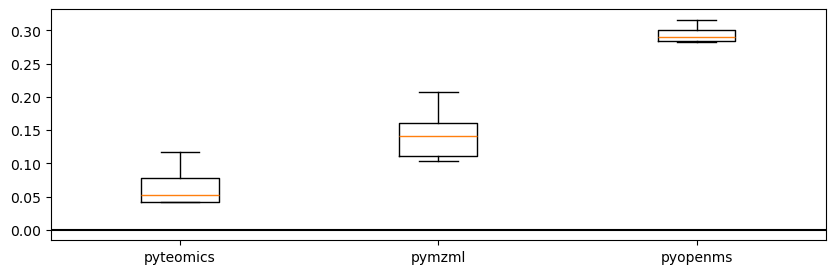

In [16]:
plt.boxplot([pyteomics_spec, pymzml_spec, pyopenms_spec], tick_labels=["pyteomics", "pymzml", "pyopenms"])
plt.axhline(y=0, color="k")
plt.show()

In [17]:
pyteomics_chrom = timeit.repeat('get_chrom_mzml_pyteomics("demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
pymzml_chrom = timeit.repeat('get_chrom_mzml_pymzml("demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
pyopenms_chrom = timeit.repeat('get_chrom_mzml_pyopenms("demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
pyopenms_chrom_2d = timeit.repeat('get_chrom_mzml_pyopenms_2DPeak("demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False


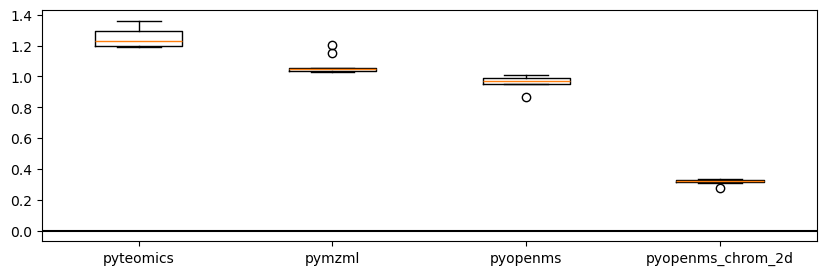

In [18]:
plt.boxplot([pyteomics_chrom, pymzml_chrom, pyopenms_chrom, pyopenms_chrom_2d], tick_labels=["pyteomics", "pymzml", "pyopenms", "pyopenms_chrom_2d"])
plt.axhline(y=0, color="k")
plt.show()

In [19]:
pyteomics_rtrange = timeit.repeat('get_rtrange_mzml_pyteomics("demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
pymzml_rtrange = timeit.repeat('get_rtrange_mzml_pymzml("demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
pyopenms_rtrange = timeit.repeat('get_rtrange_mzml_pyopenms("demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
pyopenms_rtrange_2d = timeit.repeat('get_rtrange_mzml_pyopenms_2DPeak("demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False


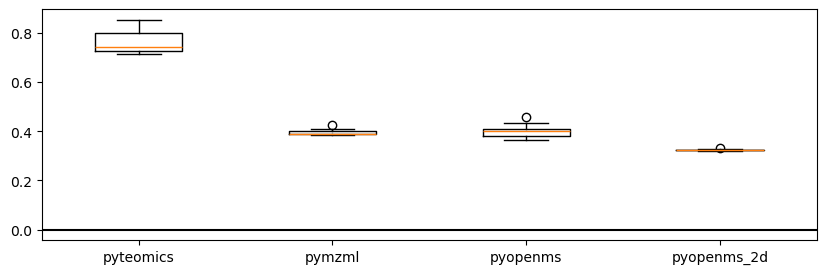

In [20]:
plt.boxplot([pyteomics_rtrange, pymzml_rtrange, pyopenms_rtrange, pyopenms_rtrange_2d], tick_labels=["pyteomics", "pymzml", "pyopenms", "pyopenms_2d"])
plt.axhline(y=0, color="k")
plt.show()